# Raport

## 1. Opis zbioru

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.ticker import MultipleLocator

In [3]:
df = pd.read_csv("World-happiness-report-2024.csv", sep=",")

   Zbiór danych składa się z **12** kolumn i **143** wierszy. W dwóch pierwszych kolumnach znajdują się *zmienne jakościowe, nominalne* i są to odpowiednio nazwa kraju oraz region, w którym dany kraj się znajduje. Ich typ to *"object"*. W następnych kolumnach mamy zmienne *ilościowe, ilorazowe* i są one typu *"float"*. 

## 2. Analiza zmiennych

In [34]:
df["Country name"].unique().shape

(143,)

W pierwszej kolumnie znajduje się **143** unikalnych zmiennych.

In [36]:
df["Regional indicator"].unique().shape

(10,)

W drugiej kolumnie mamy **10** unikalnych zmiennych.

In [25]:
df.describe()

,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
count,143.000000,143.000000,143.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,5.527580,5.641175,5.413972,1.378807,1.134329,0.520886,0.620621,0.146271,0.154121,1.575914
std,1.170717,1.155008,1.187133,0.425098,0.333317,0.164923,0.162492,0.073441,0.126238,0.537459
min,1.721000,1.775000,1.667000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.073000
25%,4.726000,4.845500,4.606000,1.077750,0.921750,0.398000,0.527500,0.091000,0.068750,1.308250
50%,5.785000,5.895000,5.674000,1.431500,1.237500,0.549500,0.641000,0.136500,0.120500,1.644500
75%,6.416000,6.507500,6.319000,1.741500,1.383250,0.648500,0.736000,0.192500,0.193750,1.881750
max,7.741000,7.815000,7.667000,2.141000,1.617000,0.857000,0.863000,0.401000,0.575000,2.998000


Powyżej znajdują się policzone statystyki dla każdej z kolumn. Po kolei mamy liczbę niepustych wartości, średnią, odchylenie standardowe, minimum, pierwszy kwartyl, drugi kwartyl (mediana), trzeci kwartyl oraz maximum. Przy czym warto dodać, że dla kolumn od *Social support* do *Perceptions of corruption* policzone zostały statystyki ze średnich, gdyż dane w tabeli są średnimi dla danego kraju.

## 3. Analiza zmiennych w zależności od przynależności do grupy

In [38]:
df.groupby("Regional indicator")["Country name"].agg("count")

Regional indicator
Central and Eastern Europe            17
Commonwealth of Independent States    10
East Asia                              6
Latin America and Caribbean           19
Middle East and North Africa          17
North America and ANZ                  4
South Asia                             6
Southeast Asia                         9
Sub-Saharan Africa                    35
Western Europe                        20
Name: Country name, dtype: int64

Powyżej policzone zostało ile krajów znajduje się w danym regionie. Najwięcej jest w *Sub-Saharan Africa* (35), a najmniej w *North America and ANZ* (4).

In [39]:
df.groupby("Regional indicator")["Ladder score"].agg("mean")

Regional indicator
Central and Eastern Europe            6.170941
Commonwealth of Independent States    5.538500
East Asia                             5.934333
Latin America and Caribbean           6.143368
Middle East and North Africa          5.199941
North America and ANZ                 6.927750
South Asia                            3.895667
Southeast Asia                        5.551889
Sub-Saharan Africa                    4.329686
Western Europe                        6.841650
Name: Ladder score, dtype: float64

Powyżej policzono średnią wartość *Ladder score* dla każdego regionu, czyli średni poziom szczęścia. Wynika stąd, że mieszkańcy *North America and ANZ* są średnio najszczęśliwsi, a mieszkańcy *South Asia* najmniej szczęśliwi.

In [40]:
df.groupby("Regional indicator").upperwhisker.agg("mean")

Regional indicator
Central and Eastern Europe            6.267529
Commonwealth of Independent States    5.637500
East Asia                             6.022667
Latin America and Caribbean           6.268263
Middle East and North Africa          5.312294
North America and ANZ                 7.012000
South Asia                            3.996500
Southeast Asia                        5.662111
Sub-Saharan Africa                    4.476200
Western Europe                        6.928500
Name: upperwhisker, dtype: float64

In [41]:
df.groupby("Regional indicator").lowerwhisker.agg("mean")

Regional indicator
Central and Eastern Europe            6.074235
Commonwealth of Independent States    5.439400
East Asia                             5.846333
Latin America and Caribbean           6.018474
Middle East and North Africa          5.087529
North America and ANZ                 6.843250
South Asia                            3.795000
Southeast Asia                        5.441556
Sub-Saharan Africa                    4.183314
Western Europe                        6.754600
Name: lowerwhisker, dtype: float64

Sytuacja wygląda podobnie jeśli policzymy średnią z górnego i dolnego kresu poziomu szczęścia.

In [44]:
df.groupby("Regional indicator")["Log GDP per capita"].agg("median")

Regional indicator
Central and Eastern Europe            1.7000
Commonwealth of Independent States    1.4330
East Asia                             1.8005
Latin America and Caribbean           1.3980
Middle East and North Africa          1.3770
North America and ANZ                 1.8470
South Asia                            1.0955
Southeast Asia                        1.3310
Sub-Saharan Africa                    0.8310
Western Europe                        1.8695
Name: Log GDP per capita, dtype: float64

Jeśli chodzi o medianę logarytmu GDP per capita liczoną dla każdego regionu, to najwyższa wartość jest w *North America and ANZ*, a najniższa w *Sub-Saharan Africa*

In [46]:
df.groupby("Regional indicator")["Healthy life expectancy"].agg("max")

Regional indicator
Central and Eastern Europe            0.695
Commonwealth of Independent States    0.603
East Asia                             0.857
Latin America and Caribbean           0.673
Middle East and North Africa          0.740
North America and ANZ                 0.701
South Asia                            0.586
Southeast Asia                        0.769
Sub-Saharan Africa                    0.490
Western Europe                        0.747
Name: Healthy life expectancy, dtype: float64

Z powyższego można odczytać, że największa maksymalna średnia wartość *Healthy life expectancy* była w *East Asia*

In [51]:
df.groupby("Regional indicator")["Perceptions of corruption"].agg("min")

Regional indicator
Central and Eastern Europe            0.000
Commonwealth of Independent States    0.025
East Asia                             0.055
Latin America and Caribbean           0.028
Middle East and North Africa          0.018
North America and ANZ                 0.169
South Asia                            0.031
Southeast Asia                        0.024
Sub-Saharan Africa                    0.019
Western Europe                        0.035
Name: Perceptions of corruption, dtype: float64

Powyżej została policzona minimalna średnia wartości *Perceptions of corruption* w każdym regionie. Stąd widać, że największe minimum jest w *North America and ANZ*.

## 4. Wykresy analizujące rozkład zmiennych

In [17]:
sns.set(rc = {'figure.figsize': (8,5)})
sns.set_style("darkgrid")
pd.options.display.max_rows = 10
pd.set_option('display.width', 5000)
pd.set_option('display.max_columns', 60)

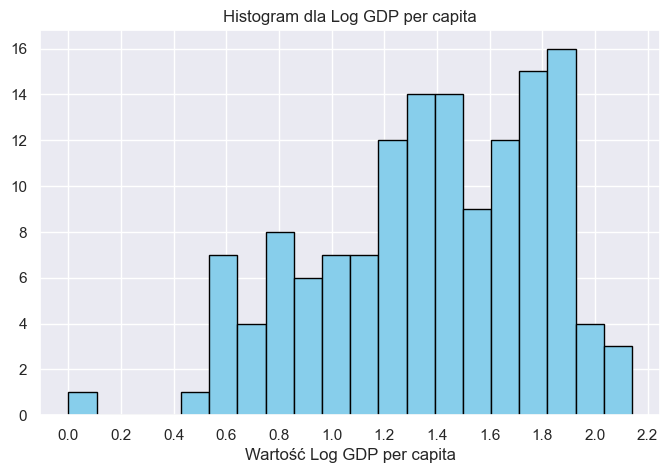

In [18]:
plt.hist(df["Log GDP per capita"], 20, edgecolor="black", color="skyblue")
plt.title("Histogram dla Log GDP per capita")
plt.xlabel("Wartość Log GDP per capita")
plt.gca().xaxis.set_major_locator(MultipleLocator(0.2))
plt.show()

Z wykresu można odczytać, że najwięcej wartości jest w okolicach **1.85**. Poza tym większość przyjmuje wartości większe niż **1.2**. Wartość **0.00** jest outlierem. 

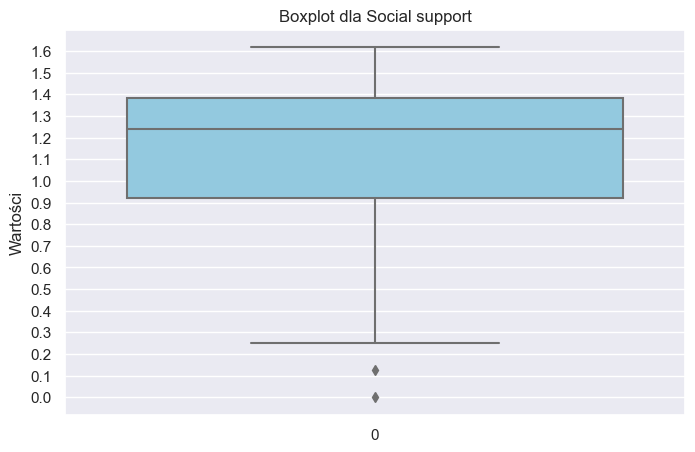

In [19]:
sns.boxplot(data=df["Social support"], color="skyblue")
plt.title("Boxplot dla Social support")
plt.ylabel("Wartości")
plt.gca().set(xlabel=None)
plt.gca().yaxis.set_major_locator(MultipleLocator(0.1))
plt.show()

Z wykresu można wywnioskować, że mediana wynosi około **1.24**, pierwszy kwartyl - około **0.92**, a trzeci około **1.4**. Wobec tego rozstęp międzykwartylowi będzie wynosić około **0.48**. Poza tym wartości mieszczą się w przedziale **[0.25, 1.62]** poza dwoma outlierami o małych wartościach.

## 5. Wykresy wskazujące zależności

1) Czy Ladder score zależy od GDP per capita?

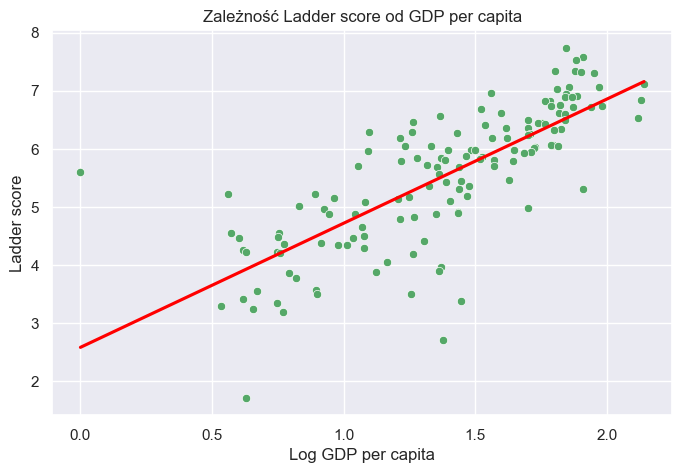

In [26]:
sns.scatterplot(data=df, x="Log GDP per capita", y="Ladder score", color="g")
plt.title("Zależność Ladder score od GDP per capita")
sns.regplot(data=df, x="Log GDP per capita", y="Ladder score", scatter=False, color='red', ci=None)
plt.show()

Z wykresu możemy odczytać, że rzeczywiście im większy GDP per capita, tym większy Ladder score. Czyli im państwo ma większe PKB, tym poziom szczęścia jest większy. Można zauważyć też dwa outliery - całkiem wysoki Ladder score przy zerowym GDP oraz bardzo niski poziom Ladder score przy GDP równym około **0.6**.

2) Czy Healthy life expectancy zależy od Social support?

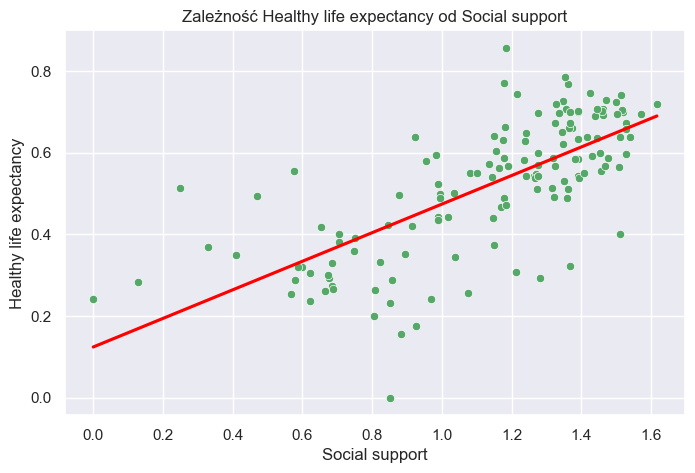

In [32]:
sns.scatterplot(data=df, x="Social support", y="Healthy life expectancy", color="g")
plt.title("Zależność Healthy life expectancy od Social support")
sns.regplot(data=df, x="Social support", y="Healthy life expectancy", scatter=False, color='red', ci=None)
plt.show()

Tutaj ponownie z wykresu wynika, że kraje które mają wyższy Social support (czyli więcej mieszkańców deklaruje, że ma kto ich wspierać w razie problemów), mają też wyższy poziom Healthy life expectancy. Poza tym najwięcej obserwacji ma Social support z przedziału **[1.2, 1.6]**, a Healthy life expectancy z przedziału **[0.5, 0.8]**.